In [2]:
import numpy as np 
import pandas as pd


In [3]:
df=pd.read_excel(r'D:\Project\Mlproject\Data\ai_dev_assignment_tickets_complex_1000.xls')

In [4]:
df.head()

,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,2,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,4,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,5,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


im thinking of adding  sentiment analysis  column as feature  for  bad  good netural   

length  of

In [5]:
df.drop("ticket_id",inplace=True,axis=1)

In [6]:
df.head()

,ticket_text,issue_type,urgency_level,product
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


In [7]:
df['issue_type'].value_counts(dropna=False)


issue_type
Billing Problem       146
General Inquiry       146
Account Access        143
Installation Issue    142
Product Defect        121
Wrong Item            114
Late Delivery         112
NaN                    76
Name: count, dtype: int64

In [8]:
df['product'].value_counts(dropna=False)

product
RoboChef Blender     116
Vision LED TV        109
PhotoSnap Cam        103
FitRun Treadmill     102
PowerMax Battery     102
EcoBreeze AC         100
ProTab X1             99
SmartWatch V2         95
SoundWave 300         90
UltraClean Vacuum     84
Name: count, dtype: int64

In [9]:
df.isnull().sum()

ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64

In [10]:
df[df['ticket_text'].isnull()].head()

,ticket_text,issue_type,urgency_level,product
9,NaN,Product Defect,High,PhotoSnap Cam
10,NaN,NaN,Medium,Vision LED TV
37,NaN,Billing Problem,High,PhotoSnap Cam
42,NaN,Billing Problem,Medium,ProTab X1
83,NaN,General Inquiry,Low,RoboChef Blender


In [11]:
# Drop rows where both ticket_text and issue_type are null
df = df.drop(df[df['ticket_text'].isnull() & df['issue_type'].isnull()].index)


In [12]:
df.isnull().sum()

ticket_text      53
issue_type       74
urgency_level    52
product           0
dtype: int64

In [13]:
df['ticket_text'] = df['ticket_text'].fillna('NoDescription')


In [14]:
df.isnull().sum()

ticket_text       0
issue_type       74
urgency_level    52
product           0
dtype: int64

In [15]:
df[df['issue_type'].isnull()]

,ticket_text,issue_type,urgency_level,product
8,Both my FitRun Treadmill and UltraClean Vacuum...,NaN,High,FitRun Treadmill
12,Vision LED TV is no response. It stopped worki...,NaN,NaN,Vision LED TV
25,Facing installation issue with RoboChef Blende...,NaN,Medium,RoboChef Blender
36,Can't log in to my account. Keeps showing bloc...,NaN,High,FitRun Treadmill
57,Can you tell me more about the warranty? Also...,NaN,High,Vision LED TV
...,...,...,...,...
941,Order #26699 for Vision LED TV is 6 days late....,NaN,Low,Vision LED TV
952,Not able to install my product.,NaN,Low,EcoBreeze AC
963,Can you tell me more about the warranty? Also...,NaN,Low,PhotoSnap Cam
972,ProTab X1 is charged. It stopped working after...,NaN,High,ProTab X1


issue_type
Billing Problem       146
General Inquiry       146
Account Access        143
Installation Issue    142
Product Defect        121
Wrong Item            114
Late Delivery         112
NaN                    76
Name: count, dtype: int64

In [16]:
df.loc[963, 'ticket_text']


'Can you tell me more about the  warranty? Also, is it available in black? Also, I contacted support on 18 May but got no response.'

In [17]:
df["token_length"] = df["ticket_text"].str.len()


In [18]:
import pandas as pd
from textblob import TextBlob


# Function to compute sentiment
def get_sentiment(text):
    if pd.isnull(text) or text.strip() == "":
        return 0.0, "neutral"
    
    blob = TextBlob(text)
    score = blob.sentiment.polarity  # -1 to +1
    
    # Map score to label
    if score < -0.2:
        label = "frustrated"
    elif score > 0.2:
        label = "happy"
    else:
        label = "neutral"
    
    return score, label

# Apply function to cleaned text column
df["sentiment_score"], df["sentiment_label"] = zip(*df["ticket_text"].map(get_sentiment))

# Save updated dataset
df.to_excel("tickets_with_sentiment.xlsx", index=False)


In [19]:
df.head(10)

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2,71,0.000000,neutral
1,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum,90,0.222917,happy
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300,80,0.000000,neutral
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam,68,-0.500000,frustrated
4,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV,127,-0.300000,frustrated
5,Can you tell me more about the PhotoSnap Cam w...,General Inquiry,Medium,PhotoSnap Cam,84,0.300000,happy
6,is malfunction. It stopped working after just...,Product Defect,Low,EcoBreeze AC,54,0.000000,neutral
7,Facing installation issue with RoboChef Blende...,Installation Issue,High,RoboChef Blender,130,-0.500000,frustrated
8,Both my FitRun Treadmill and UltraClean Vacuum...,NaN,High,FitRun Treadmill,77,-0.008333,neutral
9,NoDescription,Product Defect,High,PhotoSnap Cam,13,0.000000,neutral


In [20]:
df[df['sentiment_score']==0.5]

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label
302,Want to know more about warranty.,General Inquiry,Medium,Vision LED TV,33,0.5,happy
340,Want to know more about warranty.,General Inquiry,NaN,SmartWatch V2,33,0.5,happy
470,Want to know more about warranty.,General Inquiry,Low,UltraClean Vacuum,33,0.5,happy
556,Want to know more about warranty.,General Inquiry,High,RoboChef Blender,33,0.5,happy
948,Want to know more about warranty.,General Inquiry,High,RoboChef Blender,33,0.5,happy


In [21]:
df['sentiment_score'].describe()

count    998.000000
mean      -0.101806
std        0.241750
min       -0.625000
25%       -0.300000
50%        0.000000
75%        0.000000
max        0.500000
Name: sentiment_score, dtype: float64

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Build stopword list (preserve "no" and "not")
sw_list = stopwords.words('english')
sw_list = [w for w in sw_list if w not in ["no", "not"]]

def add_tfidf_features(df, text_column="ticket_text", max_features=5000):
    """
    Convert ticket text into TF-IDF features (unigrams + bigrams)
    and return the original DataFrame with new TF-IDF columns appended.
    
    Parameters:
        df (pd.DataFrame): Input dataframe with ticket text column
        text_column (str): Column name containing text
        max_features (int): Limit vocabulary size
    
    Returns:
        pd.DataFrame: Original df with TF-IDF feature columns added
        vectorizer: Fitted TfidfVectorizer (for reuse on new data)
    """
    # Initialize vectorizer
    vectorizer = TfidfVectorizer(
        ngram_range=(1,2),
        stop_words=sw_list,
        max_features=max_features
    )
    
    # Fit + transform
    X = vectorizer.fit_transform(df[text_column])
    
    # Convert sparse matrix to DataFrame
    tfidf_df = pd.DataFrame(
        X.toarray(),
        columns=vectorizer.get_feature_names_out(),
        index=df.index
    )
    
    # Concatenate with original df
    df_out = pd.concat([df, tfidf_df], axis=1)
    
    return df_out, vectorizer


In [23]:

# Apply function
df_with_tfidf, vec = add_tfidf_features(df, text_column="ticket_text", max_features=30)




In [24]:
df_with_tfidf.head()

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label,account,account keeps,also,...,order,ordered,payment,payment issue,response,setup,setup fails,step,support,warranty
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2,71,0.000000,neutral,0.0,0.0,0.000000,...,0.382542,0.000000,0.568239,0.586545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum,90,0.222917,happy,0.0,0.0,0.611340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.791368
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300,80,0.000000,neutral,0.0,0.0,0.000000,...,0.488439,0.637086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam,68,-0.500000,frustrated,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.323391,0.323391,0.323391,0.000000,0.000000
4,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV,127,-0.300000,frustrated,0.0,0.0,0.206571,...,0.173518,0.226325,0.000000,0.000000,0.247955,0.000000,0.000000,0.000000,0.250724,0.000000


In [25]:
print("Shape:", df_with_tfidf.shape)
print("Shape:", df.shape)

Shape: (998, 37)
Shape: (998, 7)


In [26]:
# 4) Separate labeled vs unlabeled for supervised training 
labeled_mask = df_with_tfidf["issue_type"].notna() & df_with_tfidf["urgency_level"].notna()
df_labeled = df_with_tfidf[labeled_mask].copy() 
df_unlabeled = df[~labeled_mask].copy() # keep for later inference/reporting print("Training rows:", len(df_labeled)) print("Held-out unlabeled rows:", len(df_unlabeled))

In [ ]:
# map urgency to numeric and compute correlation matrix vs numeric features
mapping = {"Low": 0, "Medium": 1, "High": 2}
df_labeled["urgency_level_numeric"] = df_labeled["urgency_level"].map(mapping)

corr_matrix = df_labeled.corr(numeric_only=True)
print("Correlation Matrix:\n", corr_matrix)

# correlations of numeric features with urgency
corr_with_urgency = corr_matrix["urgency_level_numeric"].sort_values(ascending=False)
print("\nFeatures correlated with urgency_level_numeric:\n", corr_with_urgency)

# heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.3)
plt.title("Correlation Heatmap of Numeric Features (urgency_level_numeric)")
plt.show()

In [44]:
df_labeled.head()

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label,account,account keeps,also,...,ordered,payment,payment issue,response,setup,setup fails,step,support,warranty,urgency_level_encoded
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2,71,0.0,neutral,0.0,0.0,0.00000,...,0.000000,0.568239,0.586545,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300,80,0.0,neutral,0.0,0.0,0.00000,...,0.637086,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam,68,-0.5,frustrated,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.0,0.323391,0.323391,0.323391,0.0,0.000000,1
5,Can you tell me more about the PhotoSnap Cam w...,General Inquiry,Medium,PhotoSnap Cam,84,0.3,happy,0.0,0.0,0.61134,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.791368,2
6,is malfunction. It stopped working after just...,Product Defect,Low,EcoBreeze AC,54,0.0,neutral,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1


In [27]:
from sklearn.model_selection import train_test_split

X = df_labeled.drop(columns=["ticket_text","issue_type","urgency_level","product","sentiment_label"])
y_issue = df_labeled["issue_type"]
y_urgency = df_labeled["urgency_level"]

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y_issue, test_size=0.2, random_state=42, stratify=y_issue)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X, y_urgency, test_size=0.2, random_state=42, stratify=y_urgency)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Issue Type Classifier using Random Forest
issue_clf = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # let trees grow fully
    class_weight="balanced",# handle class imbalance
    random_state=42
)
issue_clf.fit(X_train_i, y_train_i)
y_pred_issue = issue_clf.predict(X_test_i)
print("Issue Type Report:\n", classification_report(y_test_i, y_pred_issue))



Issue Type Report:
                     precision    recall  f1-score   support

    Account Access       1.00      1.00      1.00        27
   Billing Problem       1.00      0.93      0.96        28
   General Inquiry       1.00      0.89      0.94        28
Installation Issue       0.96      1.00      0.98        27
     Late Delivery       0.84      1.00      0.91        21
    Product Defect       1.00      1.00      1.00        23
        Wrong Item       1.00      1.00      1.00        22

          accuracy                           0.97       176
         macro avg       0.97      0.97      0.97       176
      weighted avg       0.98      0.97      0.97       176



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Urgency Level Classifier 
urgency_clf = SVC(kernel="linear", class_weight="balanced")
urgency_clf.fit(X_train_u, y_train_u)
y_pred_urgency = urgency_clf.predict(X_test_u)
print("Urgency Level Report:\n", classification_report(y_test_u, y_pred_urgency))


Urgency Level Report:
               precision    recall  f1-score   support

        High       0.37      0.25      0.29        61
         Low       0.33      0.51      0.40        55
      Medium       0.36      0.30      0.33        60

    accuracy                           0.35       176
   macro avg       0.35      0.35      0.34       176
weighted avg       0.35      0.35      0.34       176



Correlation Matrix:
                      token_length  sentiment_score   account  account keeps  \
token_length             1.000000         0.091374 -0.134194      -0.088530   
sentiment_score          0.091374         1.000000 -0.102151      -0.140153   
account                 -0.134194        -0.102151  1.000000       0.871089   
account keeps           -0.088530        -0.140153  0.871089       1.000000   
also                     0.472001         0.544953 -0.167047      -0.169567   
also contacted           0.712390         0.038354 -0.078756      -0.097099   
contacted                0.712390         0.038354 -0.078756      -0.097099   
contacted support        0.712390         0.038354 -0.078756      -0.097099   
days                    -0.089454        -0.119969 -0.181010      -0.173979   
facing                  -0.011814        -0.605904 -0.156858      -0.150765   
facing installation     -0.011814        -0.605904 -0.156858      -0.150765   
fails                   -0.0118

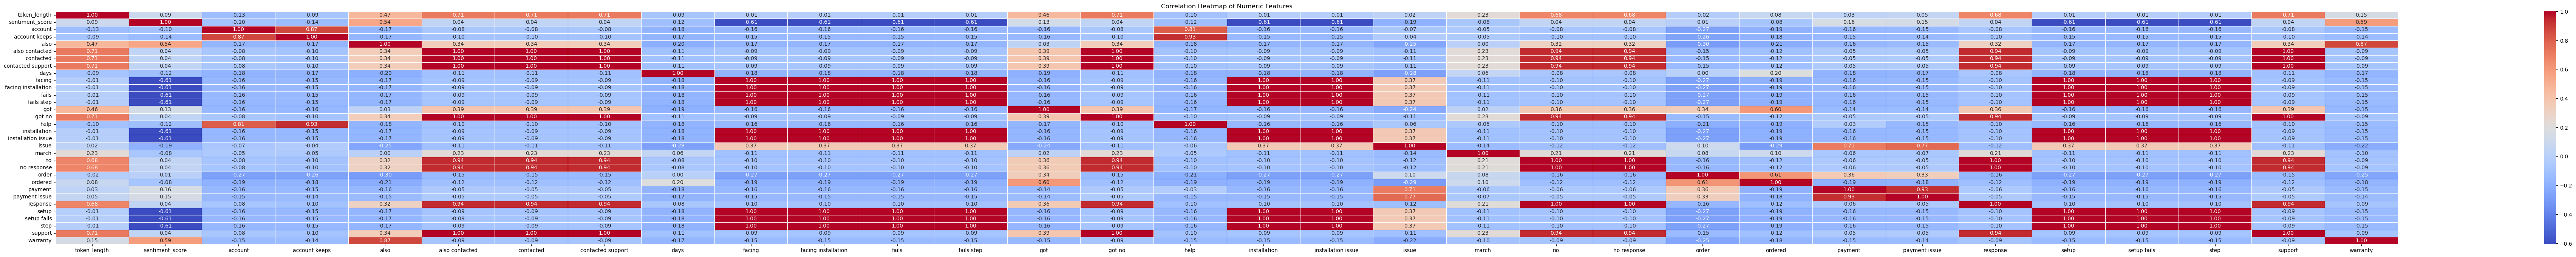

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for all numeric columns
corr_matrix = df_labeled.corr(numeric_only=True)

# Print correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(100,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Correlation Matrix:
                        token_length  sentiment_score   account  account keeps  \
token_length               1.000000         0.091374 -0.134194      -0.088530   
sentiment_score            0.091374         1.000000 -0.102151      -0.140153   
account                   -0.134194        -0.102151  1.000000       0.871089   
account keeps             -0.088530        -0.140153  0.871089       1.000000   
also                       0.472001         0.544953 -0.167047      -0.169567   
also contacted             0.712390         0.038354 -0.078756      -0.097099   
contacted                  0.712390         0.038354 -0.078756      -0.097099   
contacted support          0.712390         0.038354 -0.078756      -0.097099   
days                      -0.089454        -0.119969 -0.181010      -0.173979   
facing                    -0.011814        -0.605904 -0.156858      -0.150765   
facing installation       -0.011814        -0.605904 -0.156858      -0.150765   
fails  

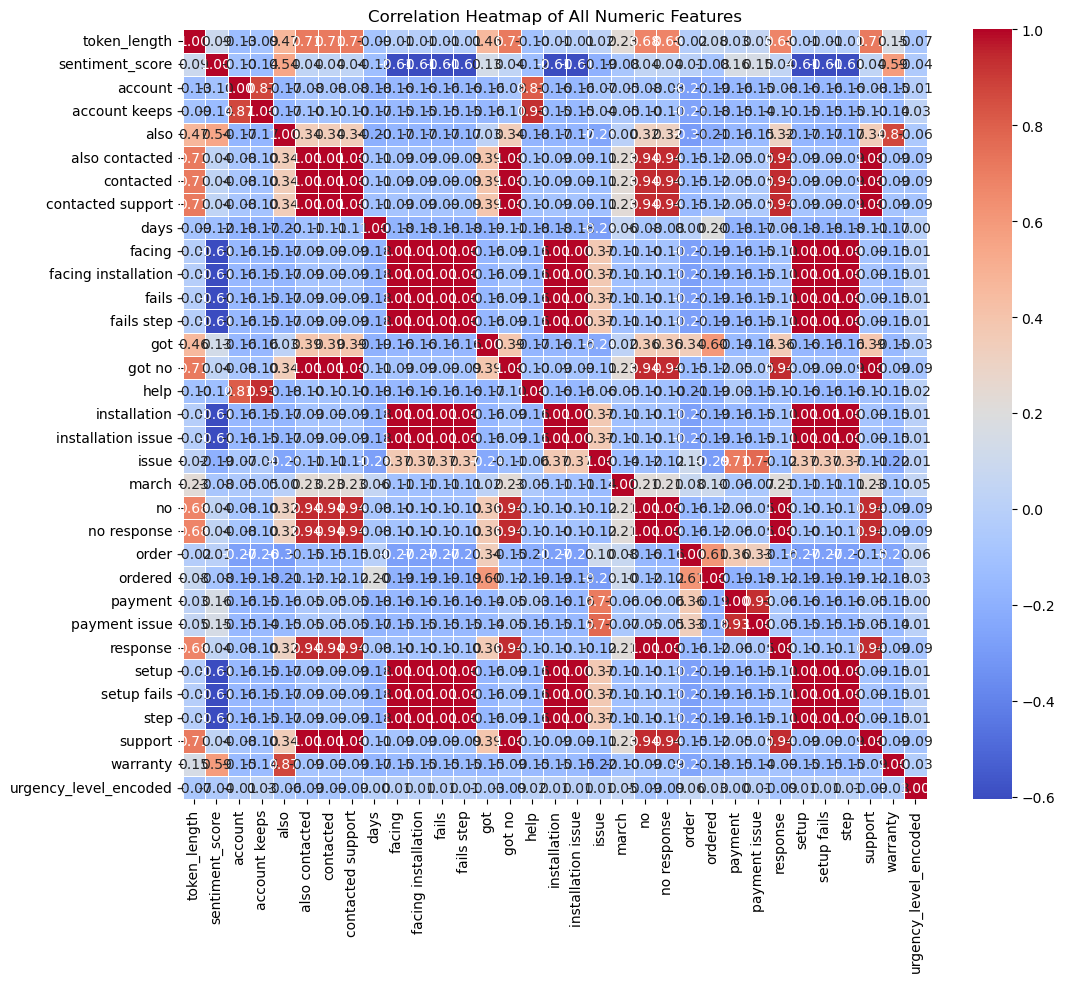

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: encode categorical labels if you want to include them
from sklearn.preprocessing import LabelEncoder
df_labeled["urgency_level_encoded"] = LabelEncoder().fit_transform(df_labeled["urgency_level"])

# Compute correlation matrix for all numeric columns
corr_matrix = df_labeled.corr(numeric_only=True)

# Print correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Numeric Features")
plt.show()


<Axes: xlabel='urgency_level', ylabel='sentiment_score'>

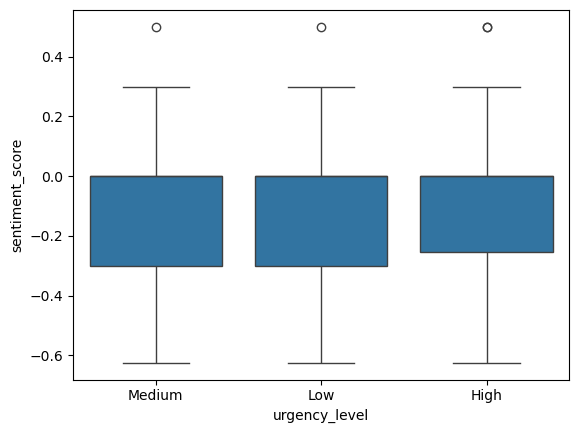

In [32]:
sns.boxplot(x="urgency_level", y="sentiment_score", data=df_labeled)

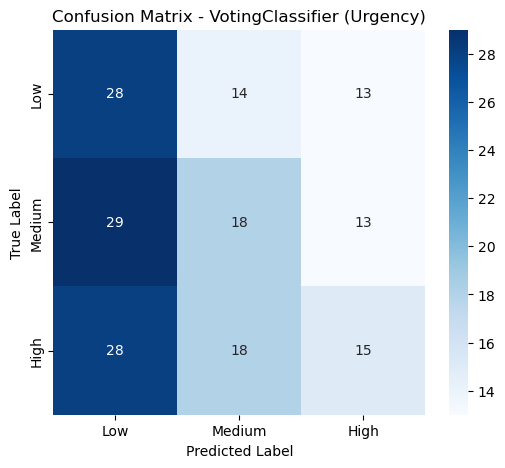

In [33]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_u, y_pred_urgency, labels=["Low","Medium","High"]) 
plt.figure(figsize=(6,5)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"]) 
plt.title("Confusion Matrix - VotingClassifier (Urgency)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [34]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. LOAD DATA
# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_file.csv')

# --- PRE-PROCESSING STEP (CRITICAL) ---
# Drop rows where 'urgency_level' is empty (like Row 2 and 5 in your image)
# You cannot train on missing targets!
df1 = df_labeled.dropna(subset=['urgency_level']).copy()

# Fill missing text values to avoid errors
df1['ticket_text'] = df['ticket_text'].fillna('')

# ---------------------------------------------------------
# 2. FEATURE ENGINEERING FUNCTIONS
# ---------------------------------------------------------

def extract_days_late(text):
    """Extracts the number of days mentioned before 'days late'."""
    # Pattern: Look for digits (\d+) followed by whitespace and 'days late'
    match = re.search(r'(\d+)\s+days?\s+late', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return 0

def check_escalation(text):
    """Checks for phrases indicating lack of response."""
    keywords = ['no response', 'contacted support', 'still not here', 'ignoring']
    for word in keywords:
        if word in text.lower():
            return 1
    return 0

def check_broken_status(text):
    """Checks for words indicating the product failed."""
    keywords = ['stopped working', 'fail', 'broken', 'malfunction', 'error']
    for word in keywords:
        if word in text.lower():
            return 1
    return 0

def get_sentiment(text):
    """Returns a score from -1 (Negative) to 1 (Positive)."""
    return TextBlob(text).sentiment.polarity

# ---------------------------------------------------------
# 3. APPLYING THE FEATURES
# ---------------------------------------------------------

# Apply the functions to create new columns
df1['days_late'] = df1['ticket_text'].apply(extract_days_late)
df1['is_escalated'] = df1['ticket_text'].apply(check_escalation)
df1['is_broken'] = df1['ticket_text'].apply(check_broken_status)
df1['sentiment'] = df1['ticket_text'].apply(get_sentiment)
df1['text_len'] = df1['ticket_text'].apply(len)

# ---------------------------------------------------------
# 4. ENCODING CATEGORICAL DATA
# ---------------------------------------------------------

# One-Hot Encode 'issue_type' and 'product'
# This turns "Billing Problem" into a column [1, 0, 0...]
df_encoded = pd.get_dummies(df1, columns=['issue_type', 'product'], drop_first=True)

# ---------------------------------------------------------
# 5. PREPARING FOR MODELING
# ---------------------------------------------------------

# Define Features (X) and Target (y)
# Drop the original text column and IDs (they aren't needed now that we extracted features)
features_to_drop = ['ticket_id', 'ticket_text', 'urgency_level','sentiment_label']
X = df_encoded.drop(columns=[c for c in features_to_drop if c in df_encoded.columns])
y = df_encoded['urgency_level']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression (now with much better features)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Check which features mattered the most (Optional)
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
print(coefficients.sort_values(by='Importance', ascending=False).head(5))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        60
         Low       1.00      1.00      1.00        54
      Medium       1.00      1.00      1.00        62

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176

                      Feature  Importance
42  issue_type_Product Defect    0.127633
34               is_escalated    0.107136
45      product_PhotoSnap Cam    0.101629
2                     account    0.083988
18                      issue    0.074245


In [35]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from scipy.sparse import hstack

# 1. TF-IDF with N-grams (captures "not working" better than just "working")
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
X_tfidf = tfidf.fit_transform(df1['ticket_text'])

# 2. Select ONLY the most impactful engineered features
# Avoid redundant 'sentiment' columns
X_eng = df1[['days_late', 'is_escalated', 'is_broken']].values

# 3. SCALE the engineered features to [0, 1] range
scaler = MaxAbsScaler()
X_eng_scaled = scaler.fit_transform(X_eng)

# 4. Combine
X_final = hstack([X_tfidf, X_eng_scaled])

# 5. Model with Class Weights (because your classes are slightly imbalanced)
model1 = LinearSVC(class_weight='balanced', C=0.5, random_state=42)
model1.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",0.5
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseud

In [36]:
# Evaluate
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        60
         Low       1.00      0.98      0.99        54
      Medium       0.98      1.00      0.99        62

    accuracy                           0.99       176
   macro avg       0.99      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176



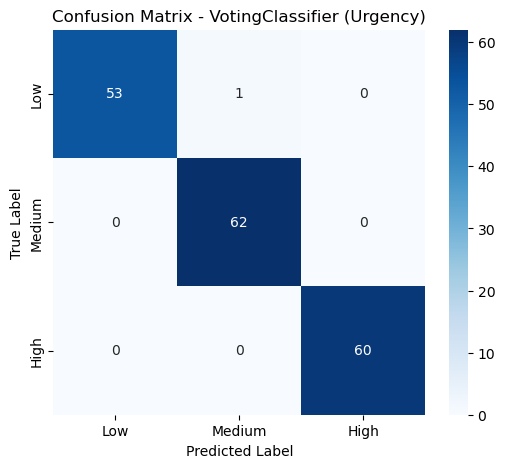

In [37]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=["Low","Medium","High"]) 
plt.figure(figsize=(6,5)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"]) 
plt.title("Confusion Matrix - VotingClassifier (Urgency)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [38]:
import re

# Your defined tiers and weights
product_tiers = {
    "SmartWatch V2": "mid", "RoboChef Blender": "mid", "EcoBreeze AC": "high",
    "PhotoSnap Cam": "low", "FitRun Treadmill": "high", "PowerMax Battery": "low",
    "ProTab X1": "mid", "SoundWave 300": "low", "UltraClean Vacuum": "mid",
    "Vision LED TV": "high"
}

issue_weights = {
    "Late Delivery": 1, "Billing Problem": 1, "Account Access": 3, 
    "Installation Issue": 1, "Product Defect": 2, "Wrong Item": 1,
    "General Inquiry": -2, "Warranty": 2 
}

def compute_urgency_score(row):
    text = str(row["ticket_text"]).lower()
    product = str(row["product"])
    issue = str(row["issue_type"])
    
    # 1. Escalation Cues
    # Adding 'days late' as a specific multiplier
    high_cues = ["no response", "stopped working", "malfunction", "error", "lost"]
    cue_hits = sum(1 for cue in high_cues if cue in text)
    
    # Extract 'days late' from text (e.g., Row 5, 15)
    days_match = re.search(r'(\d+)\s+days', text)
    days_val = int(days_match.group(1)) if days_match else 0
    delay_score = 2 if days_val > 10 else (1 if days_val > 0 else 0)
    
    # 2. Product Tier
    tier = product_tiers.get(product, "mid")
    product_score = 2 if tier == "high" else (-1 if tier == "low" else 0)
    
    # 3. Low Urgency Signals (Inquiry/Question)
    is_inquiry = 1 if "?" in text or "available" in text else 0
    inquiry_penalty = -2 if is_inquiry else 0
    
    # 4. Final Calculation
    issue_score = issue_weights.get(issue, 0)
    total_score = cue_hits + delay_score + product_score + inquiry_penalty + issue_score
    
    return total_score

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Apply heuristic
df1['heuristic_score'] = df1.apply(compute_urgency_score, axis=1)




y = df['urgency_level']

# 4. Train Random Forest (Better for structured scores than SVC)
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [40]:
# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.98      1.00      0.99        60
         Low       1.00      0.98      0.99        54
      Medium       0.98      0.98      0.98        62

    accuracy                           0.99       176
   macro avg       0.99      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176



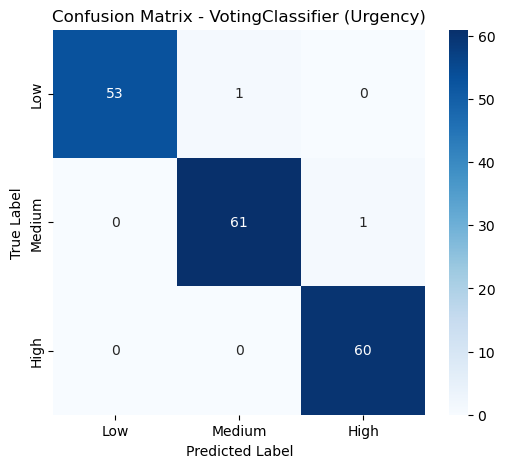

In [41]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=["Low","Medium","High"]) 
plt.figure(figsize=(6,5)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"]) 
plt.title("Confusion Matrix - VotingClassifier (Urgency)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Correlation Matrix:
                          token_length  sentiment_score   account  \
token_length                 1.000000         0.091374 -0.134194   
sentiment_score              0.091374         1.000000 -0.102151   
account                     -0.134194        -0.102151  1.000000   
account keeps               -0.088530        -0.140153  0.871089   
also                         0.472001         0.544953 -0.167047   
also contacted               0.712390         0.038354 -0.078756   
contacted                    0.712390         0.038354 -0.078756   
contacted support            0.712390         0.038354 -0.078756   
days                        -0.089454        -0.119969 -0.181010   
facing                      -0.011814        -0.605904 -0.156858   
facing installation         -0.011814        -0.605904 -0.156858   
fails                       -0.011814        -0.605904 -0.156858   
fails step                  -0.011814        -0.605904 -0.156858   
got                        

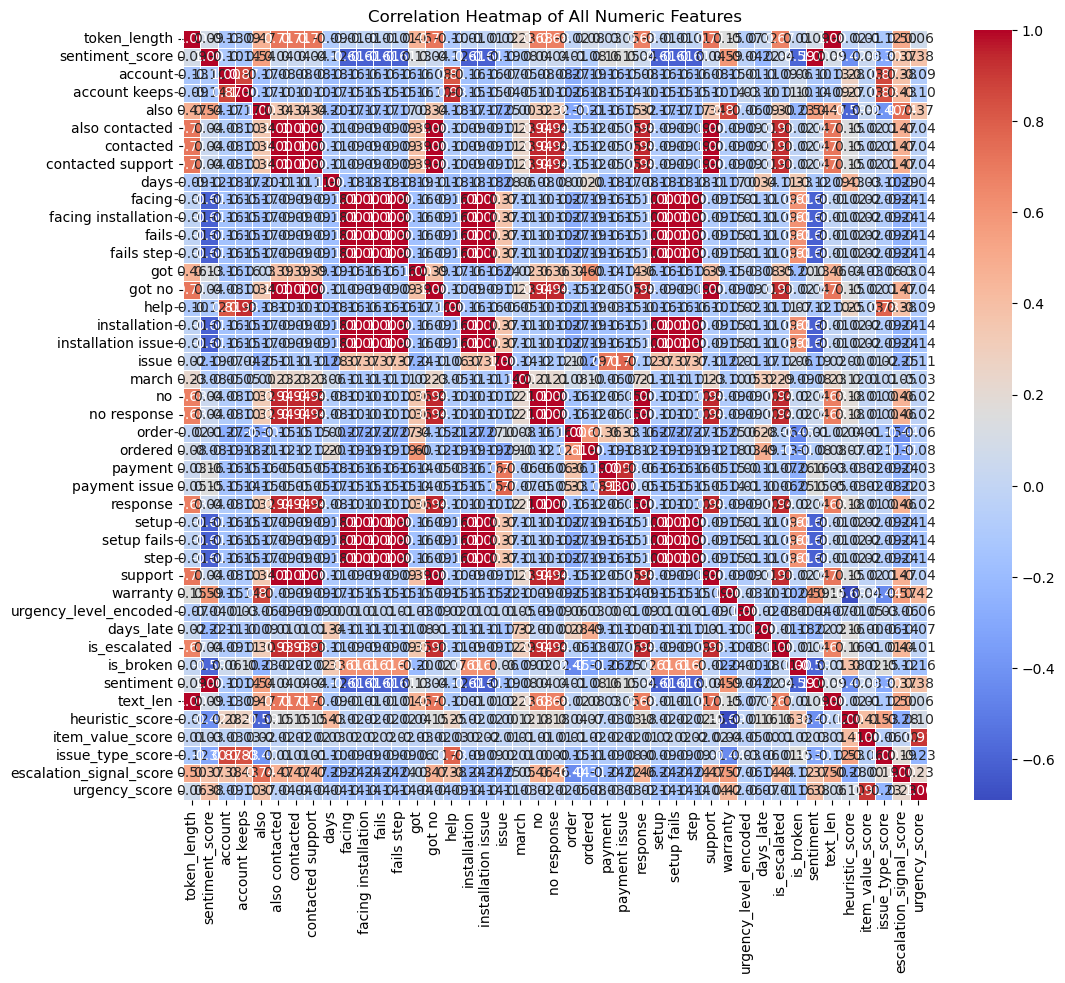

Features most correlated with urgency:
 urgency_level_encoded      1.000000
order                      0.057842
march                      0.049033
issue_type_score           0.032479
ordered                    0.029282
account keeps              0.029034
help                       0.021119
payment issue              0.011985
issue                      0.009468
facing installation        0.006919
facing                     0.006919
installation issue         0.006919
installation               0.006919
fails                      0.006919
setup fails                0.006919
setup                      0.006919
step                       0.006919
fails step                 0.006919
payment                    0.004934
days                       0.001044
is_broken                 -0.000619
account                   -0.012529
heuristic_score           -0.012741
days_late                 -0.021267
warranty                  -0.026231
got                       -0.026961
sentiment_score         

ValueError: Could not interpret value `urgency_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# 1. Feature Engineering
# -----------------------------

# Direct product-to-value mapping (numeric weights)
product_value_map = {
    "SmartWatch V2": 1.0,
    "RoboChef Blender": 1.0,
    "EcoBreeze AC": 2.0,
    "PhotoSnap Cam": 0.5,
    "FitRun Treadmill": 2.0,
    "PowerMax Battery": 0.5,
    "ProTab X1": 1.0,
    "SoundWave 300": 0.5,
    "UltraClean Vacuum": 1.0,
    "Vision LED TV": 2.0
}

# Create item_value_score directly
df1["item_value_score"] = df1["product"].map(product_value_map).fillna(1.0)


issue_weights = {
    "Late Delivery": 1.0,
    "Billing Problem": 1.0,
    "Account Access": 3.0,   # high priority
    "Installation Issue": 1.0,
    "Product Defect": 1.0,
    "Wrong Item": 1.0,
    "General Inquiry": 0.2,  # reduced weight
    "Warranty": 1.0
}

df1["issue_type_score"] = df1["issue_type"].map(issue_weights).fillna(0.5)


# Escalation signal score (keywords, punctuation, delay > 5 days)
def compute_escalation_signal(row):
    text = str(row.get("ticket_text", "")).lower()
    delay = row.get("delivery_days", 0)

    keywords = ["warranty", "no response", "log in", "access"]
    keyword_hits = sum(1 for kw in keywords if kw in text)

    special_chars = sum(text.count(c) for c in ["!", "?"])
    caps = sum(1 for word in text.split() if word.isupper())

    score = 0
    score += keyword_hits * 1.5
    score += special_chars * 0.5
    score += caps * 0.5
    score += 2 if delay > 5 else 0

    return score

df1["escalation_signal_score"] = df1.apply(compute_escalation_signal, axis=1)

# -----------------------------
# 2. Encode Target Variable
# -----------------------------
le = LabelEncoder()
df1["urgency_level_encoded"] = le.fit_transform(df1["urgency_level"])

# -----------------------------
# 3. Composite Urgency Score
# -----------------------------
# Using top 5 features: item_value_score, no_response, warranty, setup_fails, sentiment_score
df1["urgency_score"] = (
    2 * df1["item_value_score"] +
    1.5 * df1.get("no_response", 0) +
    1.5 * df1.get("warranty", 0) +
    1.5 * df1.get("setup_fails", 0) +
    1.0 * df1.get("sentiment_score", 0)
)

# -----------------------------
# 4. Correlation Analysis
# -----------------------------
corr_matrix = df1.corr(numeric_only=True)
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Numeric Features")
plt.show()

# Rank features by correlation with urgency
corr_with_urgency = corr_matrix["urgency_level_encoded"].sort_values(ascending=False)
print("Features most correlated with urgency:\n", corr_with_urgency)

# -----------------------------
# 5. Visualization of Urgency Score
# -----------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x="urgency_level", y="urgency_score", data=df)
plt.title("Boxplot of Urgency Score vs Urgency Level")
plt.xlabel("Urgency Level")
plt.ylabel("Urgency Score")
plt.show()


In [ ]:
df_encoded.to_csv('Google.csv')

In [ ]:
df

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label,item_value_score,issue_type_score,escalation_signal_score,urgency_level_encoded,urgency_score
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2,71,0.000000,neutral,1.0,1.0,0.0,2,2.000000
1,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum,90,0.222917,happy,1.0,0.2,2.5,3,2.222917
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300,80,0.000000,neutral,0.5,1.0,0.0,2,1.000000
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam,68,-0.500000,frustrated,0.5,1.0,0.0,1,0.500000
4,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV,127,-0.300000,frustrated,2.0,1.0,1.5,3,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,I ordered EcoBreeze AC but got FitRun Treadmil...,Wrong Item,High,EcoBreeze AC,83,0.000000,neutral,2.0,1.0,0.0,0,4.000000
996,I ordered SoundWave 300 but got PowerMax Batte...,Wrong Item,Low,SoundWave 300,143,0.000000,neutral,0.5,1.0,1.5,1,1.000000
997,NoDescription,Installation Issue,Medium,EcoBreeze AC,13,0.000000,neutral,2.0,1.0,0.0,2,4.000000
998,Payment issue fr mi SoundWave 300. I was debit...,Billing Problem,Low,SoundWave 300,77,0.000000,neutral,0.5,1.0,0.0,1,1.000000


Basic Preprocessing

Lower case
Tokenization
remove stopwords
Stemming / Lemmatizatio

In [ ]:
df['ticket_text']=df['ticket_text'].apply(lambda x:x.lower())

In [ ]:
from nltk.corpus import stopwords
import nltk
sw_list = stopwords.words('english')
# Remove negation words from stopword list
sw_list = [w for w in sw_list if w not in ["no", "not"]]

df['ticket_text'] = df['ticket_text'].apply(
    lambda x: " ".join([item for item in x.split() if item.lower() not in sw_list])
)


In [ ]:
df

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label
0,payment issue smartwatch v2. underbilled order...,Billing Problem,Medium,SmartWatch V2,71,0.000000,neutral
1,"tell ultraclean vacuum warranty? also, availab...",General Inquiry,NaN,UltraClean Vacuum,90,0.222917,happy
2,ordered soundwave 300 got ecobreeze ac instead...,Wrong Item,Medium,SoundWave 300,80,0.000000,neutral
3,facing installation issue photosnap cam. setup...,Installation Issue,Low,PhotoSnap Cam,68,-0.500000,frustrated
4,order #30903 vision led tv 13 days late. order...,Late Delivery,NaN,Vision LED TV,127,-0.300000,frustrated
...,...,...,...,...,...,...,...
995,ordered ecobreeze ac got fitrun treadmill inst...,Wrong Item,High,EcoBreeze AC,83,0.000000,neutral
996,ordered soundwave 300 got powermax battery ins...,Wrong Item,Low,SoundWave 300,143,0.000000,neutral
997,nodescription,Installation Issue,Medium,EcoBreeze AC,13,0.000000,neutral
998,payment issue fr mi soundwave 300. debited inc...,Billing Problem,Low,SoundWave 300,77,0.000000,neutral


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        # keep only alphabetic tokens, remove stopwords
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)  # use lemma instead of raw token
    return " ".join(tokens)

sample ="The product was delivered late and I was charged twice"
print(preprocess_text(sample))

product deliver late charge twice


In [ ]:
# Apply preprocessing to every row in ticket_text
df["clean_text"] = df["ticket_text"].apply(preprocess_text)


In [ ]:
df

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label,clean_text
0,payment issue smartwatch v2. underbilled order...,Billing Problem,Medium,SmartWatch V2,71,0.000000,neutral,payment issue smartwatch underbilled order
1,"tell ultraclean vacuum warranty? also, availab...",General Inquiry,NaN,UltraClean Vacuum,90,0.222917,happy,tell ultraclean vacuum warranty available white
2,ordered soundwave 300 got ecobreeze ac instead...,Wrong Item,Medium,SoundWave 300,80,0.000000,neutral,order soundwave get ecobreeze ac instead order...
3,facing installation issue photosnap cam. setup...,Installation Issue,Low,PhotoSnap Cam,68,-0.500000,frustrated,face installation issue photosnap cam setup fa...
4,order #30903 vision led tv 13 days late. order...,Late Delivery,NaN,Vision LED TV,127,-0.300000,frustrated,order vision lead tv day late order march cont...
...,...,...,...,...,...,...,...,...
995,ordered ecobreeze ac got fitrun treadmill inst...,Wrong Item,High,EcoBreeze AC,83,0.000000,neutral,order ecobreeze ac get fitrun treadmill instea...
996,ordered soundwave 300 got powermax battery ins...,Wrong Item,Low,SoundWave 300,143,0.000000,neutral,order soundwave get powermax battery instead o...
997,nodescription,Installation Issue,Medium,EcoBreeze AC,13,0.000000,neutral,nodescription
998,payment issue fr mi soundwave 300. debited inc...,Billing Problem,Low,SoundWave 300,77,0.000000,neutral,payment issue fr mi soundwave debit incorrectl...


In [ ]:
product_list =df['product'].unique()
product_list

array(['SmartWatch V2', 'UltraClean Vacuum', 'SoundWave 300',
       'PhotoSnap Cam', 'Vision LED TV', 'EcoBreeze AC',
       'RoboChef Blender', 'FitRun Treadmill', 'PowerMax Battery',
       'ProTab X1'], dtype=object)

In [ ]:
import spacy, re
nlp = spacy.load("en_core_web_sm")

# Example product list and complaint keywords
product_list =df['product'].unique()
complaint_keywords = [
    "broken",
    "late",
    "error",
    "faulty",
    "damaged",
    "missing",
    "wrong",
    "delay",
    "lost",
    "no response"
    "charged"
]


In [ ]:
def extract_entities(text):
    text_lower = text.lower()#############
    doc = nlp(text)############## ask what is this aslo ask if words in productlist needs to be lemmatised for it to work well
    
    entities = {"products": [], "dates": [], "order_number": [], "complaints": []}
    
    # Products
    for product in product_list:
        if product.lower() in text_lower:
            entities["products"].append(product)
    
    # Dates
    for ent in doc.ents:
        if ent.label_ == "DATE":
            entities["dates"].append(ent.text)
    regex_dates = re.findall(r"\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b", text)
    entities["dates"].extend(regex_dates)
    
    # Order numbers
    order_ids = re.findall(r"(?:order\s*#?\s*\d+|#\d+)", text_lower)
    entities["order_number"].extend(order_ids)
    
    # Complaint keywords
    for token in doc:
        if token.lemma_.lower() in complaint_keywords:
            entities["complaints"].append(token.lemma_.lower())
    if "no response" in text_lower:
        entities["complaints"].append("no response")
    
    # Deduplicate
    entities = {k: list(set(v)) for k,v in entities.items()}
    
    return {"entities": entities}


In [ ]:
sample=df['ticket_text'][29]
print(extract_entities(sample))
print(sample)

{'entities': {'products': ['SmartWatch V2'], 'dates': ['17 days'], 'order_number': ['order #28983'], 'complaints': ['no response', 'late']}}
order #28983 smartwatch v2 17 days late. ordered 05 may. also, contacted support 05 may got no response.


In [ ]:
df["extracted_entities"] = df["ticket_text"].apply(extract_entities)


In [ ]:
df

,ticket_text,issue_type,urgency_level,product,token_length,sentiment_score,sentiment_label,clean_text,extracted_entities
0,payment issue smartwatch v2. underbilled order...,Billing Problem,Medium,SmartWatch V2,71,0.000000,neutral,payment issue smartwatch underbilled order,"{'entities': {'products': ['SmartWatch V2'], '..."
1,"tell ultraclean vacuum warranty? also, availab...",General Inquiry,NaN,UltraClean Vacuum,90,0.222917,happy,tell ultraclean vacuum warranty available white,{'entities': {'products': ['UltraClean Vacuum'...
2,ordered soundwave 300 got ecobreeze ac instead...,Wrong Item,Medium,SoundWave 300,80,0.000000,neutral,order soundwave get ecobreeze ac instead order...,"{'entities': {'products': ['SoundWave 300', 'E..."
3,facing installation issue photosnap cam. setup...,Installation Issue,Low,PhotoSnap Cam,68,-0.500000,frustrated,face installation issue photosnap cam setup fa...,"{'entities': {'products': ['PhotoSnap Cam'], '..."
4,order #30903 vision led tv 13 days late. order...,Late Delivery,NaN,Vision LED TV,127,-0.300000,frustrated,order vision lead tv day late order march cont...,"{'entities': {'products': ['Vision LED TV'], '..."
...,...,...,...,...,...,...,...,...,...
995,ordered ecobreeze ac got fitrun treadmill inst...,Wrong Item,High,EcoBreeze AC,83,0.000000,neutral,order ecobreeze ac get fitrun treadmill instea...,"{'entities': {'products': ['EcoBreeze AC', 'Fi..."
996,ordered soundwave 300 got powermax battery ins...,Wrong Item,Low,SoundWave 300,143,0.000000,neutral,order soundwave get powermax battery instead o...,"{'entities': {'products': ['PowerMax Battery',..."
997,nodescription,Installation Issue,Medium,EcoBreeze AC,13,0.000000,neutral,nodescription,"{'entities': {'products': [], 'dates': [], 'or..."
998,payment issue fr mi soundwave 300. debited inc...,Billing Problem,Low,SoundWave 300,77,0.000000,neutral,payment issue fr mi soundwave debit incorrectl...,"{'entities': {'products': ['SoundWave 300'], '..."
